# **ES 114 Probability Lab Assignment - 9**

Name- Shardul Rakesh Junagade

Roll No- 23110297

# **Dimensionality Reduction**

In this notebook, I have performed Dimensionality Reduction on the IRIS dataset provided. The notebook is divided into the following sections:

1. Estimating the covariance matrix of the four attributes of the IRIS dataset.
2. Estimating the four principal components of the data.
3. Performing dimensionality reduction using Principal Component Analysis (PCA) to reduce the 150 data points into two dimensions and three dimensions.
4. Visualizing the reduced 2D and 3D data points, with different colors assigned to data points corresponding to different species.


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading Iris Dataset

The Iris dataset, a well-known dataset in machine learning and statistics, contains measurements of four features (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`) for 150 samples of three species: `setosa`, `versicolor`, and `virginica`. This dataset was used for all computations and visualizations in this assignment.

By analyzing these metrics and correlations, the relationships between the features were studied comprehensively, both across the entire dataset and within individual species.


In [2]:
data = sns.load_dataset("iris")
display(data)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
species_list=data["species"].unique()
print("The unique species in the given dataset are:")
print(species_list)

The unique species in the given dataset are:
['setosa' 'versicolor' 'virginica']


In [4]:
numeric_data=data[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
standardized_data = (numeric_data-numeric_data.mean())/numeric_data.std()
print("Standardized Data:\n")
display(standardized_data)

Standardized Data:



,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


## Helper Functions

#### Mean:
For a dataset $X = \{x_1, x_2, \dots, x_n\}$, the mean is given by:  
$$
\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}
$$


In [5]:
# Function to calculate the mean of the data
def calc_mean(data):
  sum=0
  for i in data:
    sum+=i
  mean=sum/len(data)
  return mean

#### Variance:

Sample variance (denoted by s²) is a statistical measure that tells you how spread out a set of data (sample) is from its average (sample mean). It essentially quantifies the variability within the sample.

The variance measures the spread of data from the mean:  
$$
s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}
$$


In [6]:
# Function to calculate the variance of the data
def calc_variance(data):
  mean=calc_mean(data)
  sum=0
  for i in data:
    sum+=((i-mean)**2)
  variance=sum/(len(data)-1)
  return variance

#### Covariance:

Sample covariance $(s_{xy})$ is a statistical measure that tells you how two variables within a sample dataset tend to vary together. It captures the direction and strength of the linear relationship between them.

Covariance can be calculated as follows:
$$
s_{xy} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n - 1}
$$

In [7]:
# Function to calculate the covariance of 2 variables
def calc_covariance(data_1, data_2):
  mean_1=calc_mean(data_1)
  mean_2=calc_mean(data_2)
  sum=0
  for i in range(len(data_1)):
    sum+=(data_1[i]-mean_1)*(data_2[i]-mean_2)
  covariance=sum/(len(data_1)-1)
  return covariance

# Function to calculate the covariance matrix
def calculate_covariance_matrix(data):
	attributes = data.columns
	covariance_matrix = np.zeros((len(attributes), len(attributes)))
	for i in range(len(attributes)):
		for j in range(len(attributes)):
			data1 = data[attributes[i]]
			data2 = data[attributes[j]]
			covariance_matrix[i, j] = calc_covariance(data1, data2)
	return covariance_matrix

# Function to plot the covariance matrix
def plot_covariance_matrix(data):
	covariance_matrix = calculate_covariance_matrix(data)
	sns.heatmap(covariance_matrix, annot=True, xticklabels=data.columns, yticklabels=data.columns, cmap='Blues')
	plt.title("Covariance Matrix")
	plt.show()

#### Correlation Coefficient:

The correlation coefficient ($r$) is a statistical measure that tells you the strength and direction of the linear relationship between two variables in a data set. It provides a single value between -1 and 1.


The correlation coefficient is calculated as:  
$$
r = \frac{s_{xy}}{\sqrt{s_x^2} \cdot \sqrt{s_y^2}}
$$  
Here, $s_x^2$ and $s_y^2$ are the variances of $x$ and $y$, respectively, and $s_{xy}$ is their covariance.


In [8]:
# Function to calculate the correlation coefficient of 2 variables
def correlation_coefficient(data_1,data_2):
  variance_1=calc_variance(data_1)
  variance_2=calc_variance(data_2)
  covariance=calc_covariance(data_1,data_2)
  corr=covariance/((variance_1**(1/2))*(variance_2**(1/2)))
  return corr

# I. Covariance Matrix

Covariance Matrix:

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


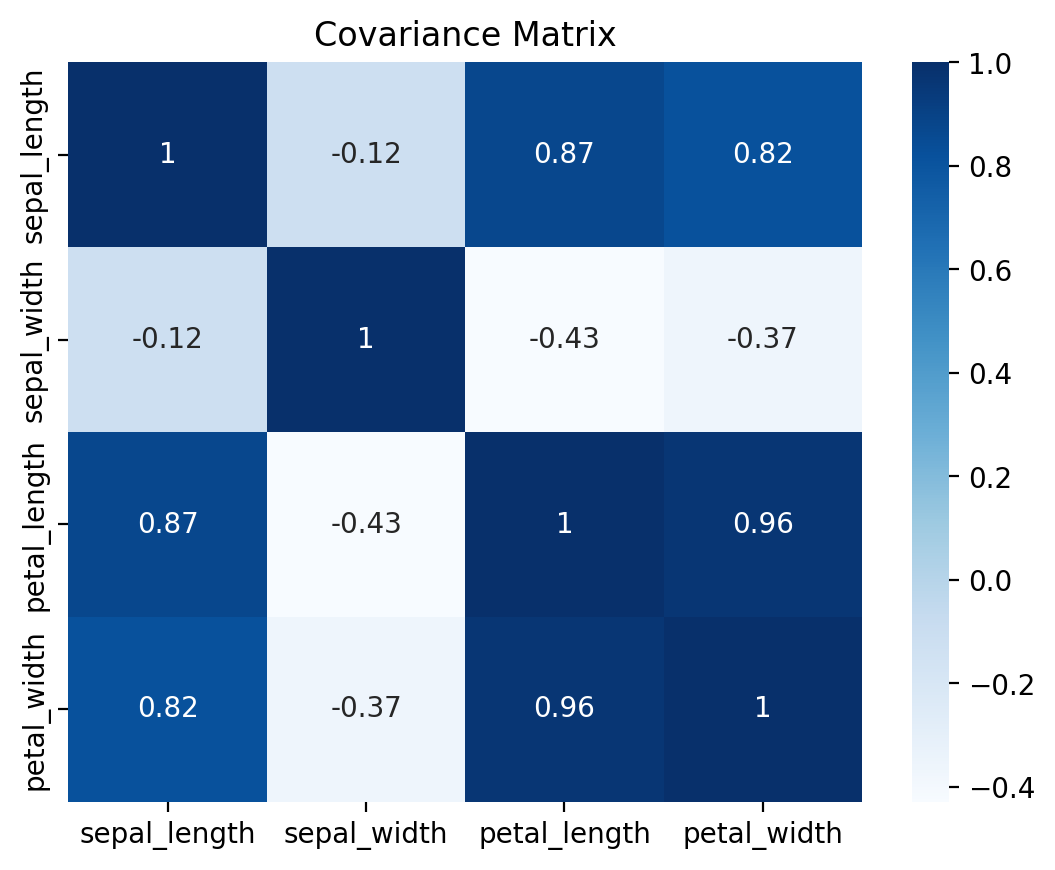

In [9]:
# Calculate the covariance matrix
covariance_matrix = calculate_covariance_matrix(standardized_data)
print("Covariance Matrix:\n")
print(covariance_matrix)

plot_covariance_matrix(standardized_data)

# II. Principle Components

In [10]:
# This function calculates the eigen values and eigen vectors of the covariance matrix in the descending order of the eigen values by default.
eigen_values, eigen_vectors=np.linalg.eig(covariance_matrix)
print("Eigen Values:")
print(eigen_values)
print("\nEigen Vector Matrix:")
print(eigen_vectors)



# # Sort eigenvalues and eigenvectors in descending order
# sorted_indices = np.argsort(eigen_values)[::-1]
# sorted_eigen_values = eigen_values[sorted_indices]
# sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

# # Display sorted eigenvalues and eigenvectors
# print("\n\nSorted Eigen Values:")
# print(sorted_eigen_values)
# print("\nSorted Eigen Vectors:")
# print(sorted_eigen_vectors)

Eigen Values:
[2.91849782 0.91403047 0.14675688 0.02071484]

Eigen Vector Matrix:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [11]:
print("The 4 principle components of the dataset are as follows:\n")
for i in range(len(eigen_vectors)):
  print(f"Principle Component {i+1}: {eigen_vectors.T[i]}")

The 4 principle components of the dataset are as follows:

Principle Component 1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
Principle Component 2: [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
Principle Component 3: [-0.71956635  0.24438178  0.14212637  0.63427274]
Principle Component 4: [ 0.26128628 -0.12350962 -0.80144925  0.52359713]


In [12]:
# Optionally, print the explained variance ratio
explained_variance_ratio = eigen_values / eigen_values.sum()
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Explained Variance Ratio:
[0.72962445 0.22850762 0.03668922 0.00517871]


# III. Dimensionality Reduction using PCA

### Reducing to 2 dimensions

In [13]:
top2_eigen_vectors=eigen_vectors[:,:2]
data_2d=np.dot(standardized_data, top2_eigen_vectors)
data_2d_df=pd.DataFrame(data_2d, columns=["PC1", "PC2"])
print("Shape of the dataset after performing dimensionality reduction to 2 dimensions:", data_2d_df.shape)
data_2d_df["species"]=data["species"]
print("\nDataset after performing dimensionality reduction to 2 dimensions:")
display(data_2d_df)

Shape of the dataset after performing dimensionality reduction to 2 dimensions: (150, 2)

Dataset after performing dimensionality reduction to 2 dimensions:


,PC1,PC2,species
0,-2.257141,-0.478424,setosa
1,-2.074013,0.671883,setosa
2,-2.356335,0.340766,setosa
3,-2.291707,0.595400,setosa
4,-2.381863,-0.644676,setosa
...,...,...,...
145,1.864258,-0.385674,virginica
146,1.559356,0.893693,virginica
147,1.516091,-0.268171,virginica
148,1.368204,-1.007878,virginica


### Reducing to 3 dimensions

In [14]:
top3_eigen_vectors=eigen_vectors[:,:3]
data_3d=np.dot(standardized_data,top3_eigen_vectors)
data_3d_df=pd.DataFrame(data_3d, columns=["PC1", "PC2", "PC3"])
print("Shape of the dataset after performing dimensionality reduction to 3 dimensions:", data_3d_df.shape)
data_3d_df["species"]=data["species"]
print("\nDataset after performing dimensionality reduction to 3 dimensions:")
display(data_3d_df)

Shape of the dataset after performing dimensionality reduction to 3 dimensions: (150, 3)

Dataset after performing dimensionality reduction to 3 dimensions:


,PC1,PC2,PC3,species
0,-2.257141,-0.478424,-0.127280,setosa
1,-2.074013,0.671883,-0.233826,setosa
2,-2.356335,0.340766,0.044054,setosa
3,-2.291707,0.595400,0.090985,setosa
4,-2.381863,-0.644676,0.015686,setosa
...,...,...,...,...
145,1.864258,-0.385674,0.255418,virginica
146,1.559356,0.893693,-0.026283,virginica
147,1.516091,-0.268171,0.179577,virginica
148,1.368204,-1.007878,0.930279,virginica


# IV. Visualizing the reduced 2D and 3D data

### 2D Scatter Plot

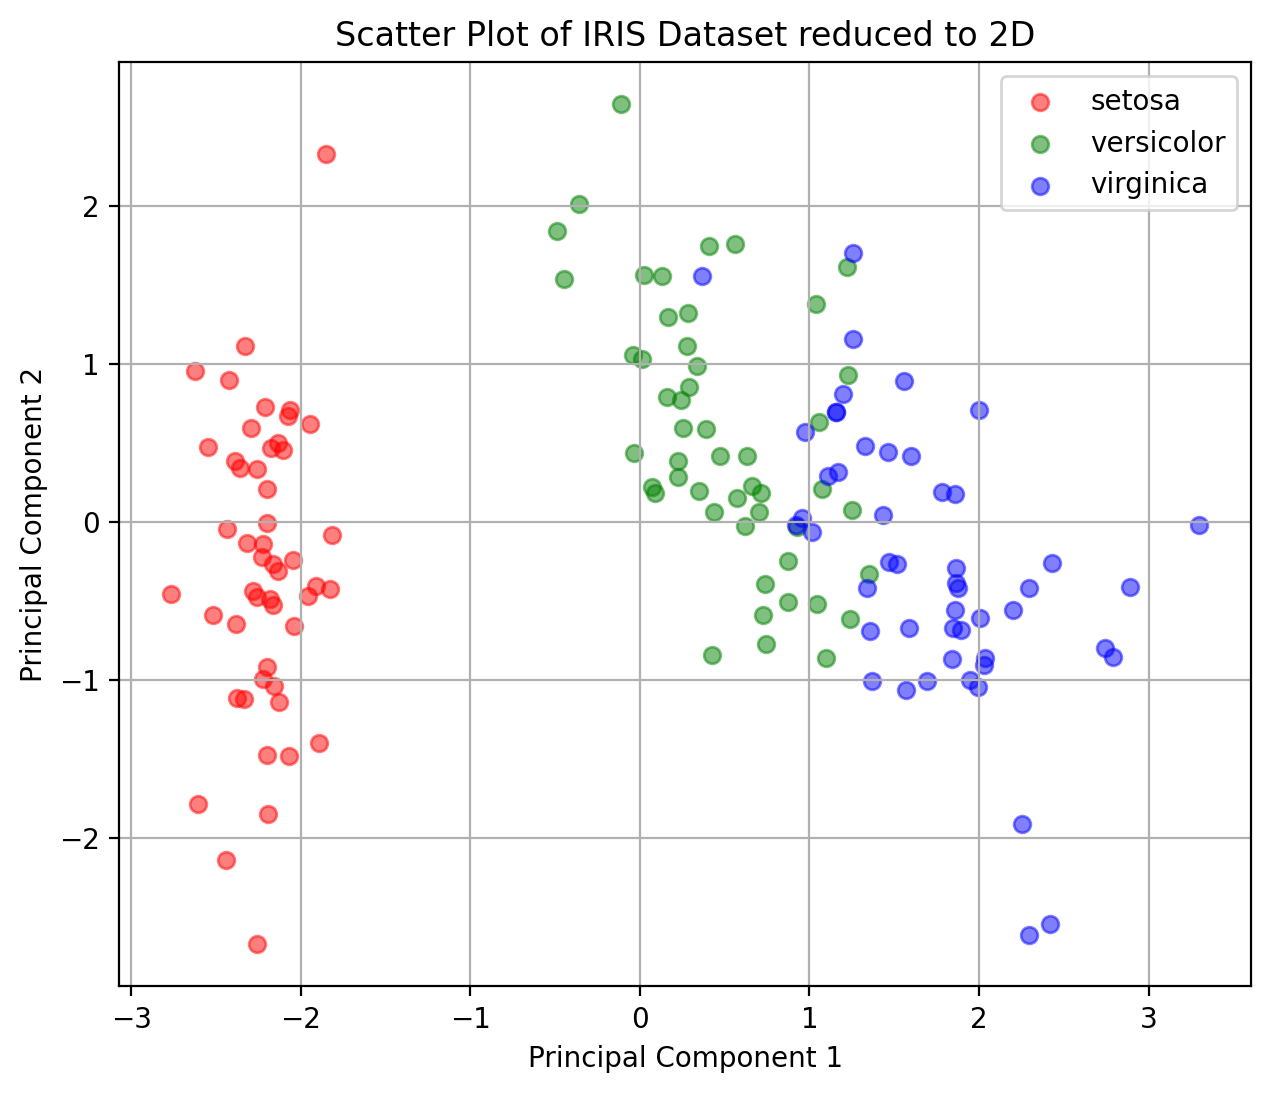

In [15]:
species=np.unique(data["species"])
colors=["r","g","b"]
plt.figure(figsize=(7.3,6))
for i in range(len(species)):
  species_data=data_2d_df[data_2d_df["species"]==species[i]]
  plt.scatter(species_data["PC1"], species_data["PC2"], label=species[i], color=colors[i], alpha=0.5)
plt.title("Scatter Plot of IRIS Dataset reduced to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

### 3D Scatter Plot

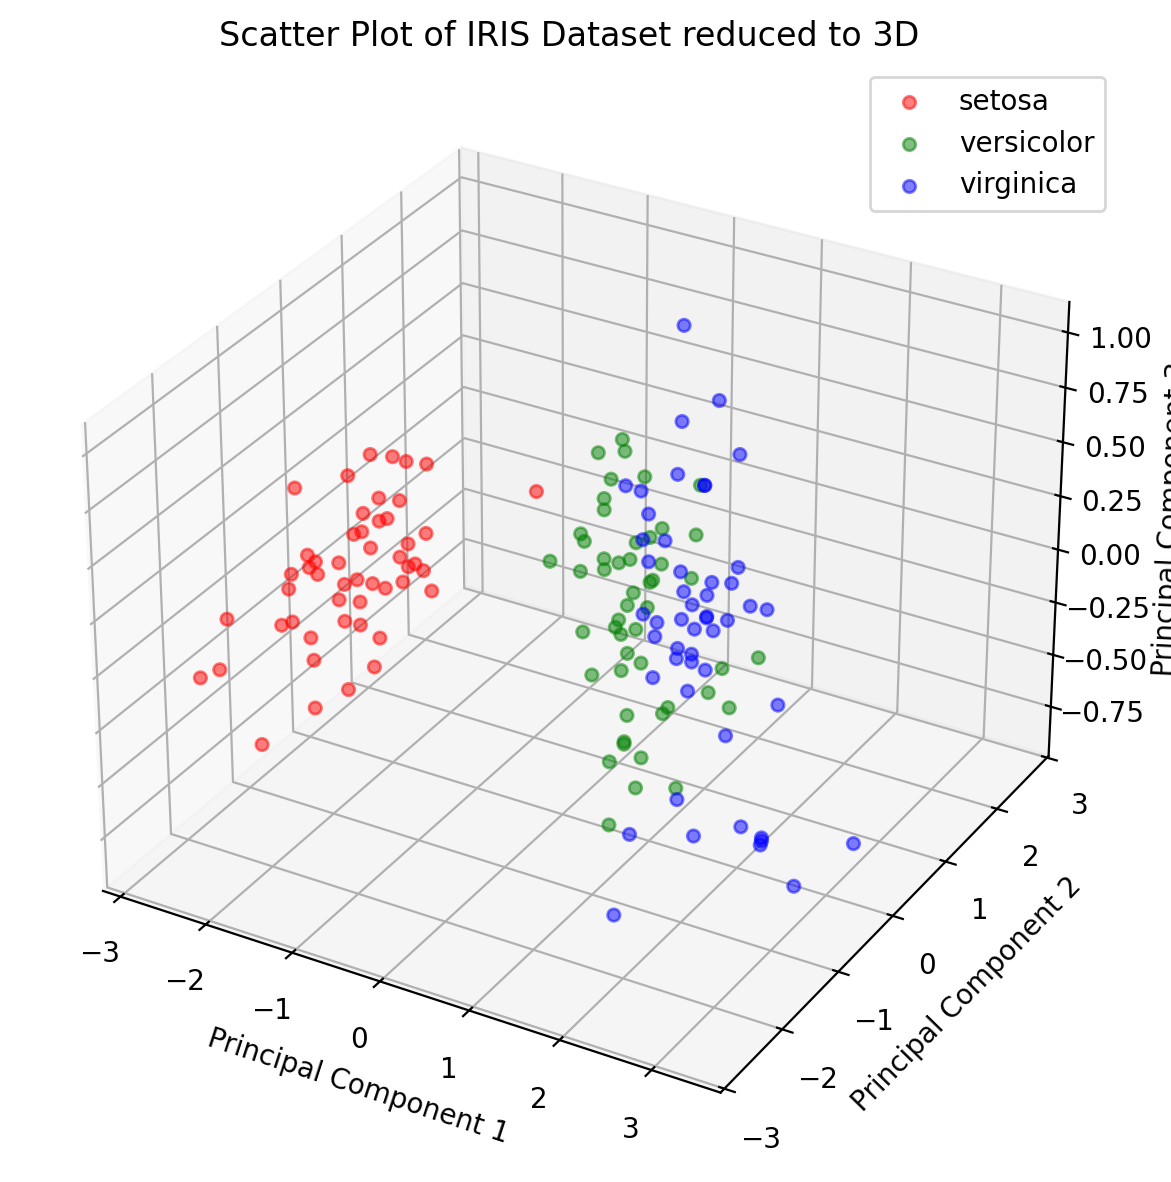

In [16]:
species=np.unique(data["species"])
colors=["r","g","b"]
fig = plt.figure(figsize=(6.5,6))
ax = plt.axes(projection ="3d")
for i in range(len(species)):
    species_data=data_3d_df[data_3d_df["species"]==species[i]]
    ax.scatter(species_data["PC1"],species_data["PC2"],species_data["PC3"], label=species[i], color=colors[i], alpha=0.5)
ax.set_title("Scatter Plot of IRIS Dataset reduced to 3D")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.legend()
plt.tight_layout()
plt.show()

# References

1. “seaborn-data/iris.csv at master · mwaskom/seaborn-data,” GitHub. https://github.com/mwaskom/seaborn-data/blob/master/iris.csv

2. “seaborn.load_dataset — seaborn 0.11.1 documentation,” seaborn.pydata.org. https://seaborn.pydata.org/generated/seaborn.load_dataset.html

3. [Lab Discussion Notes](https://drive.google.com/file/d/1Zwj8hH5WB5mtLyrGyrx5RluG2F660GQj/view)